<a href="https://colab.research.google.com/github/SpecularAura/DAV-SEM5/blob/master/Exp4_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis using Python

Courtesy for Dataset - [AQI of India](https://drive.google.com/file/d/1ZVa-MRgDRyNkjyv4KLcLkTPJnY_UB32X/view?usp=drive_link)

## Step - 1 : Importing Python Packages, Loading Data and Displaying the top 5 and last 5 rows

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [ ]:
# Dataset Link: https://drive.google.com/file/d/1ZVa-MRgDRyNkjyv4KLcLkTPJnY_UB32X/view?usp=drive_link
dataset = pd. read_csv("/content/Sion_CAAQM_StationDataWithAQI.csv")
dataset = dataset[["Timestamp", "AQI_calculated"]]
dataset.describe()

,AQI_calculated
count,4858.000000
mean,138.492590
std,78.276659
min,19.000000
25%,71.000000
50%,121.500000
75%,190.000000
max,515.000000


In [ ]:
# Parse strings to datatime type
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
indexedDataset = dataset.set_index(['Timestamp'])
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.resample('1M').mean()

In [ ]:
indexedDataset.head(5)

,AQI_calculated
Timestamp,
2019-06-30,72.375000
2019-07-31,62.857143
2019-08-31,51.666667
2019-09-30,62.522222
2019-10-31,115.956989


In [ ]:
indexedDataset.tail(5)

,AQI_calculated
Timestamp,
2023-08-31,119.290698
2023-09-30,91.300000
2023-10-31,177.935484
2023-11-30,192.488889
2023-12-31,142.838710


## Step - 2 : Plotting the raw data

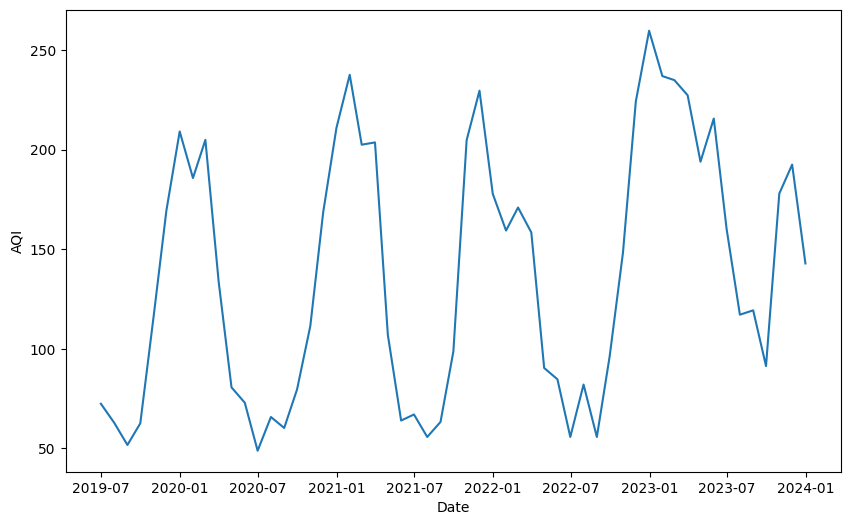

In [ ]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("AQI")
plt.plot(indexedDataset)

## Step - 3 : Check the stationarity of raw data

### a. Using Rolling Statistics

In [ ]:
# Detecting Stationarity using Rolling Statistics
# As the mean is not constant, That
# rolling mean at yearly level
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

            AQI_calculated
Timestamp                 
2019-06-30             NaN
2019-07-31             NaN
2019-08-31             NaN
2019-09-30             NaN
2019-10-31             NaN
2019-11-30             NaN
2019-12-31             NaN
2020-01-31             NaN
2020-02-29             NaN
2020-03-31             NaN
2020-04-30             NaN
2020-05-31      118.482354
2020-06-30      116.515919
2020-07-31      116.754294
2020-08-31      117.466660
2020-09-30      118.884329
2020-10-31      118.507985
2020-11-30      118.424226
2020-12-31      118.572971
2021-01-31      122.893984
2021-02-28      122.692321
2021-03-31      128.522070
2021-04-30      130.720176
2021-05-31      129.974393
2021-06-30      131.491060
2021-07-31      130.655270
2021-08-31      130.907958
2021-09-30      132.496771
2021-10-31      140.272757
2021-11-30      145.370489
2021-12-31      142.609736
2022-01-31      136.089127
2022-02-28      133.460037
2022-03-31      129.690685
2022-04-30      128.303690
2

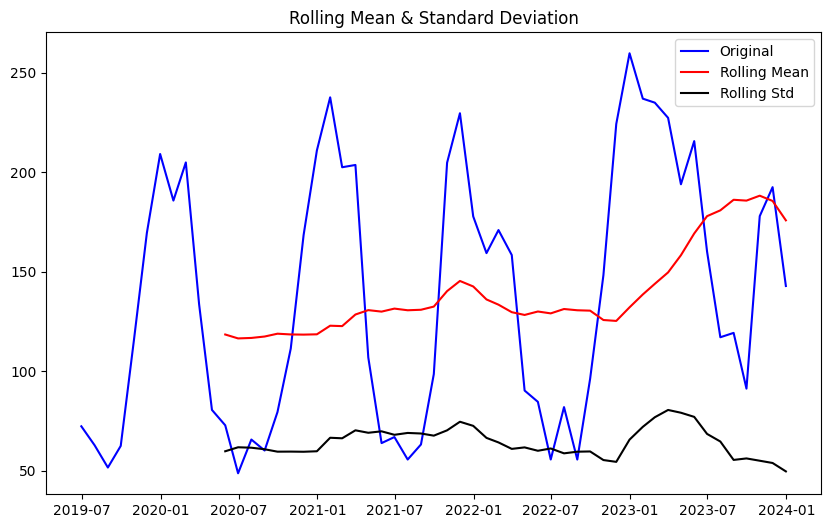

In [ ]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

### b. Using Augmented Dicky-Fuller (ADF) Test

In [ ]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['AQI_calculated'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic              -4.728731
p-value                      0.000074
#Lags used                   3.000000
No. of observations used    51.000000
Critical value (1%)         -3.565624
Critical value (5%)         -2.920142
Critical value (10%)        -2.598015
dtype: float64


### c. test_stationarity()

 - Returns Plotting of Rolling Statistics
 - Test Statistics of Augmented Dicky-Fuller (ADF) test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['AQI_calculated'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

## Step - 4 : Perform transformation to incorporate stationarity

#### Applying LogSCale to Raw Data

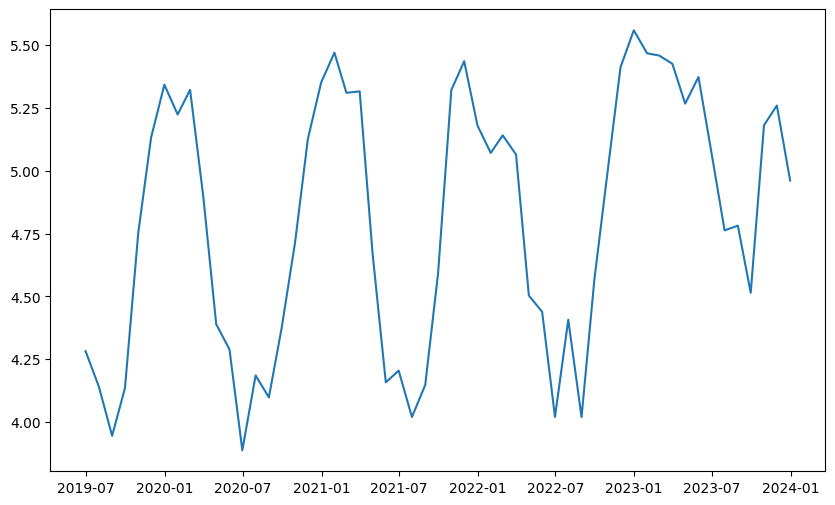

In [ ]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

***Observation*** : When plotted, the scale changes as raw data is transformed to Logarithmic Scale

### Transformation - 1 : Subtracting Moving Average from LogScale Data

#### 1(a) : Computation

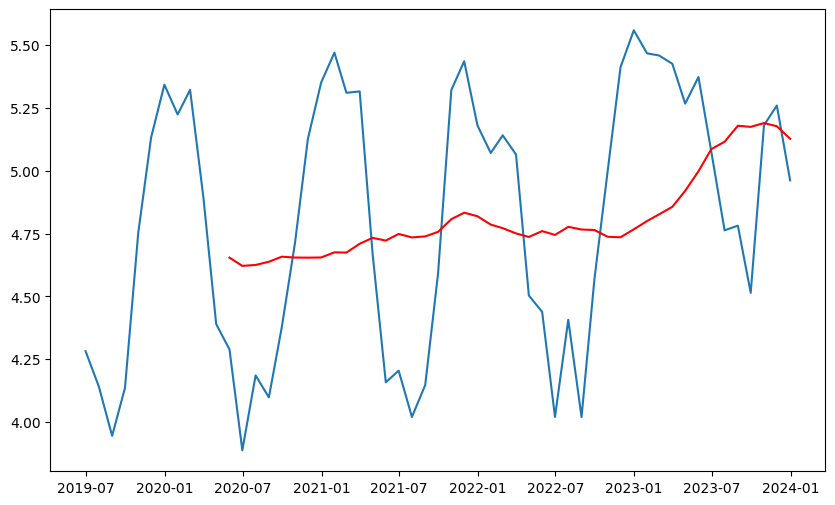

In [ ]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [ ]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,AQI_calculated
Timestamp,
2019-06-30,NaN
2019-07-31,NaN
2019-08-31,NaN
2019-09-30,NaN
2019-10-31,NaN
2019-11-30,NaN
2019-12-31,NaN
2020-01-31,NaN
2020-02-29,NaN


In [ ]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,AQI_calculated
Timestamp,
2020-05-31,-0.365561
2020-06-30,-0.734225
2020-07-31,-0.439840
2020-08-31,-0.540045
2020-09-30,-0.281835
2020-10-31,0.058782
2020-11-30,0.472419
2020-12-31,0.696577
2021-01-31,0.795157


#### 1(b) : Plotting

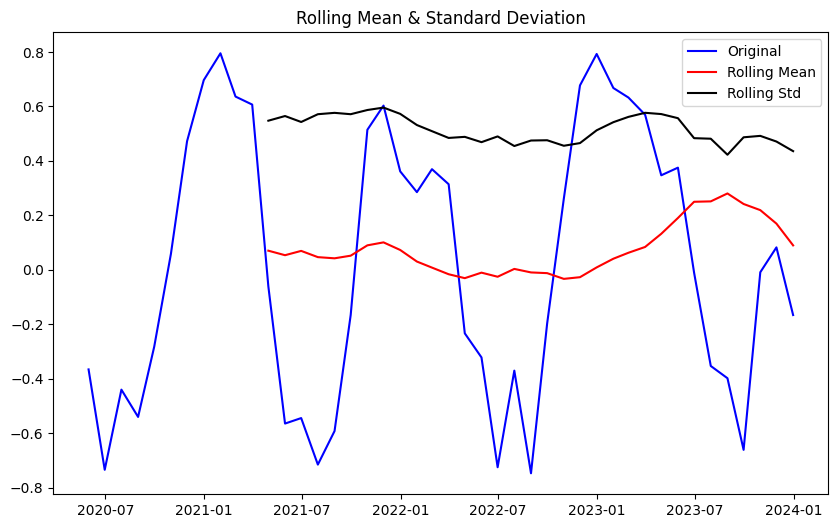

Results of Dickey Fuller Test
Test statistic              -4.655390
p-value                      0.000102
#Lags used                   5.000000
No. of observations used    38.000000
Critical value (1%)         -3.615509
Critical value (5%)         -2.941262
Critical value (10%)        -2.609200
dtype: float64


In [ ]:
test_stationarity(dataLogScaleMinusMovingAverage)

Note :
* Test statistics & Critical values are almost equal. This helps to understand whether your data is stationary or not.
* p-value is almost nearer to 0


### Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

#### 2(a) : Computation

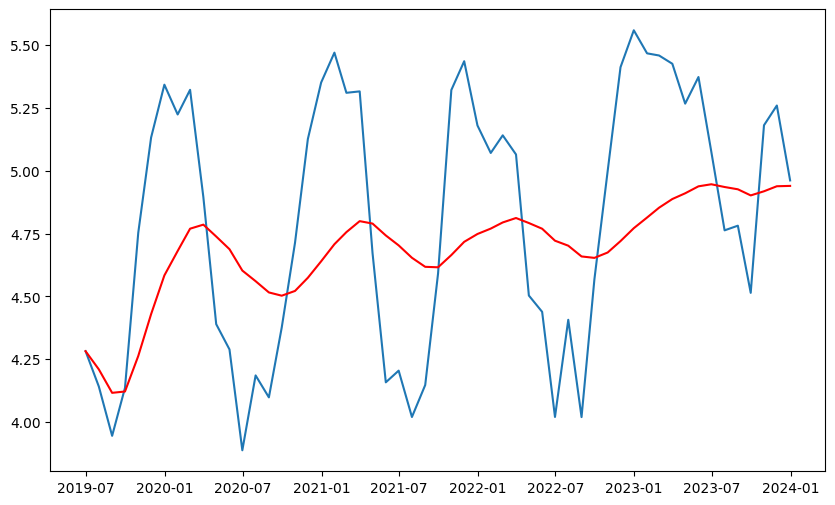

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

As the time series progresses, the average is also progessing to higher side

In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

#### 2(c) :  Plotting

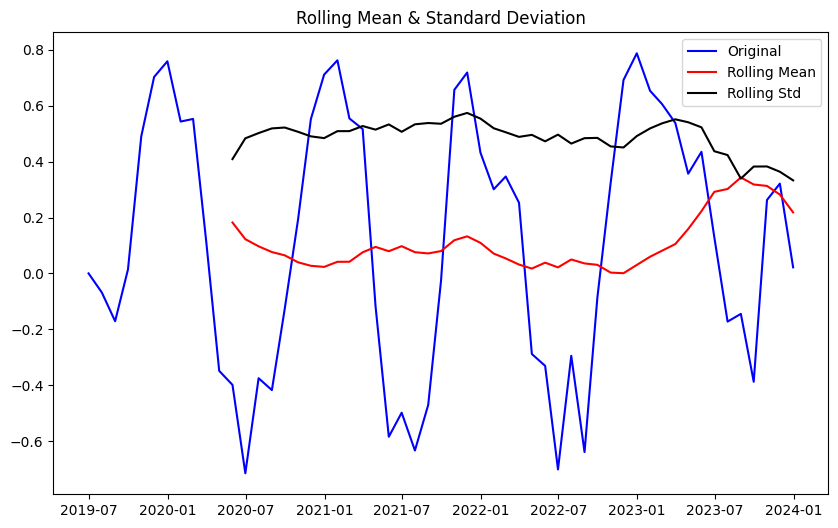

Results of Dickey Fuller Test
Test statistic              -5.460462
p-value                      0.000003
#Lags used                   5.000000
No. of observations used    49.000000
Critical value (1%)         -3.571472
Critical value (5%)         -2.922629
Critical value (10%)        -2.599336
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

* The std deviation is almost flat. That means there is no trend.
* Rolling mean better than previous results.
* p value is nearing 0 ==> time series stationary.

## Step - 5 : Understanding the **Components** of Time Series

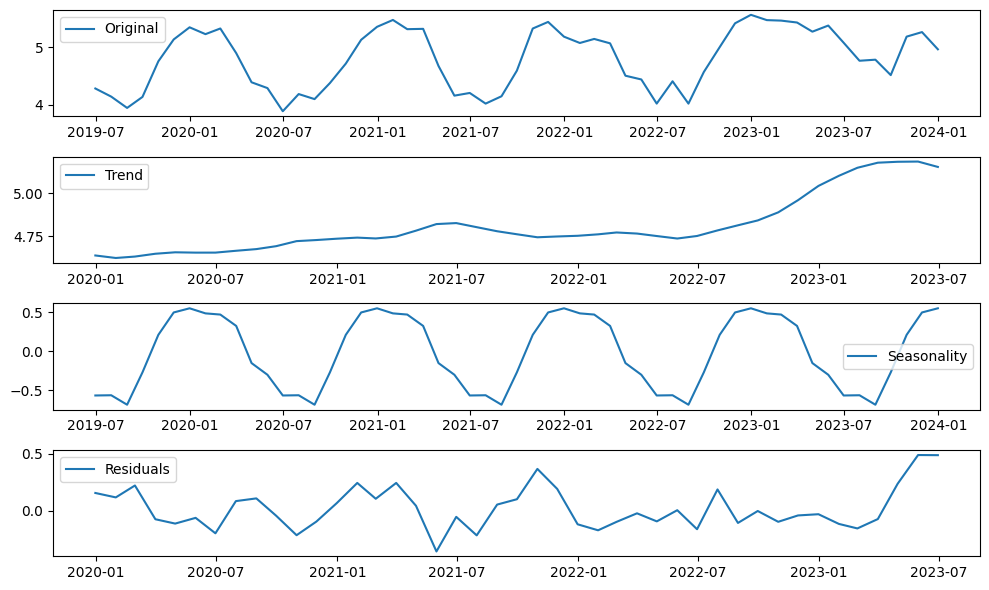

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* It shows a positive trend
* Depicts the seasonality component in the dataset
* Depicts the irregularity /  residuals present in the data

## Step - 6 : Check whether the noise is stationary or not

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

Timestamp
2019-12-31    0.155118
2020-01-31    0.116071
2020-02-29    0.221222
2020-03-31   -0.076996
2020-04-30   -0.115393
2020-05-31   -0.064751
2020-06-30   -0.201277
2020-07-31    0.083339
2020-08-31    0.107289
2020-09-30   -0.045638
2020-10-31   -0.218037
2020-11-30   -0.097730
2020-12-31    0.066144
2021-01-31    0.243896
2021-02-28    0.104058
2021-03-31    0.244023
2021-04-30    0.041920
2021-05-31   -0.361728
2021-06-30   -0.055836
2021-07-31   -0.219529
2021-08-31    0.052615
2021-09-30    0.100007
2021-10-31    0.367880
2021-11-30    0.191366
2021-12-31   -0.121687
2022-01-31   -0.174667
2022-02-28   -0.100077
2022-03-31   -0.024618
2022-04-30   -0.095911
2022-05-31    0.002942
2022-06-30   -0.165259
2022-07-31    0.186437
2022-08-31   -0.109658
2022-09-30   -0.004122
2022-10-31   -0.099597
2022-11-30   -0.043390
2022-12-31   -0.032580
2023-01-31   -0.118306
2023-02-28   -0.158207
2023-03-31   -0.075414
2023-04-30    0.236380
2023-05-31    0.490533
2023-06-30    0.489368
F

In [ ]:
decomposedLogData.describe()

count    43.000000
mean      0.016749
std       0.185913
min      -0.361728
25%      -0.104868
50%      -0.032580
75%       0.111680
max       0.490533
Name: resid, dtype: float64

In [ ]:
decomposedLogData.head(12)

Timestamp
2019-12-31    0.155118
2020-01-31    0.116071
2020-02-29    0.221222
2020-03-31   -0.076996
2020-04-30   -0.115393
2020-05-31   -0.064751
2020-06-30   -0.201277
2020-07-31    0.083339
2020-08-31    0.107289
2020-09-30   -0.045638
2020-10-31   -0.218037
2020-11-30   -0.097730
Freq: M, Name: resid, dtype: float64

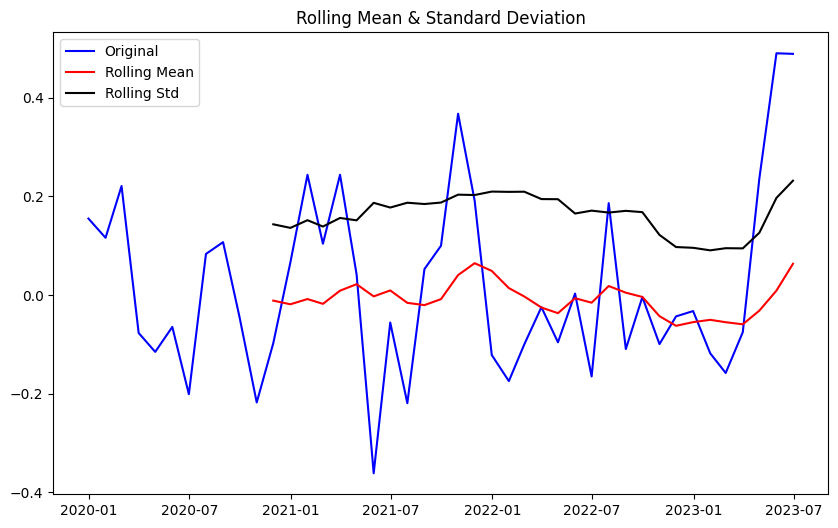

Results of Dickey Fuller Test


KeyError: 'AQI_calculated'

In [ ]:
_decomposedLogData = decomposedLogData.copy(deep=True)
_decomposedLogData.columns = ["Timestamp", "AQI_calculated"]
test_stationarity(_decomposedLogData)

Observation : The residuals are not stationary.

## Step - 7 : Implement the AR Model

### 7(a) : Plot the ACF and PACF graphs
- for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

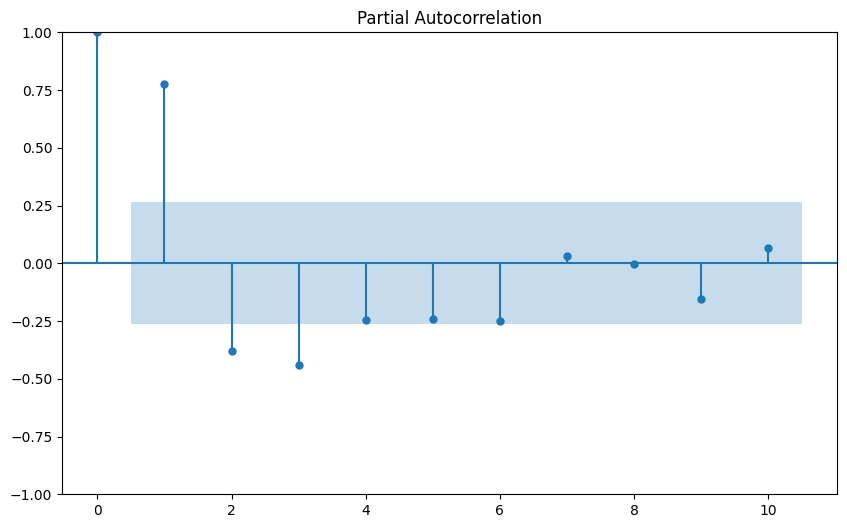

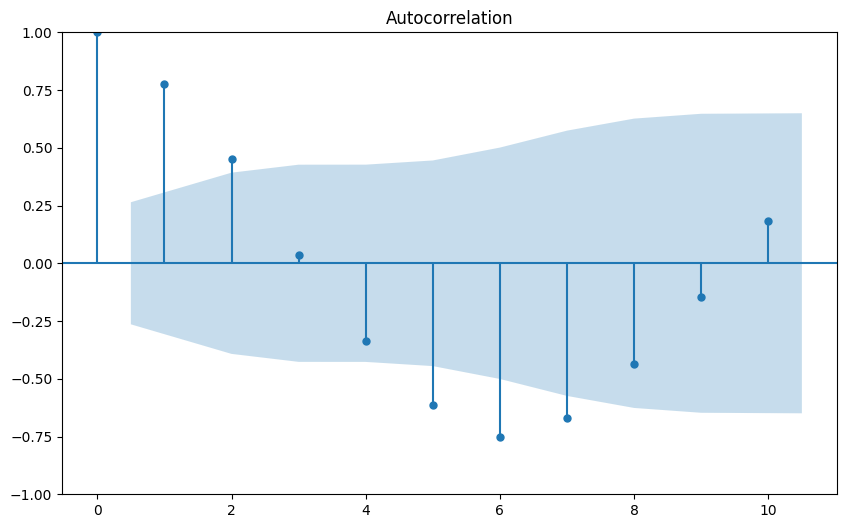

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

### 7(b) : Split the LogScale Data for Training & Testing
- Training with 7 years data
- Testing with 5 years data

In [ ]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

### 7(c) : Train the AR Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

In [ ]:
print(model_1.summary())

                            AutoReg Model Results                             
Dep. Variable:         AQI_calculated   No. Observations:                   50
Model:                     AutoReg(1)   Log Likelihood                  -8.030
Method:               Conditional MLE   S.D. of innovations              0.285
Date:                Sun, 31 Mar 2024   AIC                             22.060
Time:                        20:42:06   BIC                             27.736
Sample:                    07-31-2019   HQIC                            24.213
                         - 07-31-2023                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0230      0.042      0.544      0.586      -0.060       0.106
AQI_calculated.L1     0.7969      0.087      9.146      0.000       0.626       0.968
                        

Observation : Lower the p value, more significant that time lag

In [ ]:
# Experimenting with lag = 10
# model_2 = AutoReg(train, lags=10).fit()
#print(model_2.summary())

### 7(d) : Test the AR Model

In [ ]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

In [ ]:
print(len(train))

50


In [ ]:
print(pred)

2023-08-31   -0.114509
2023-09-30   -0.068229
2023-10-31   -0.031350
2023-11-30   -0.001962
2023-12-31    0.021457
Freq: M, dtype: float64


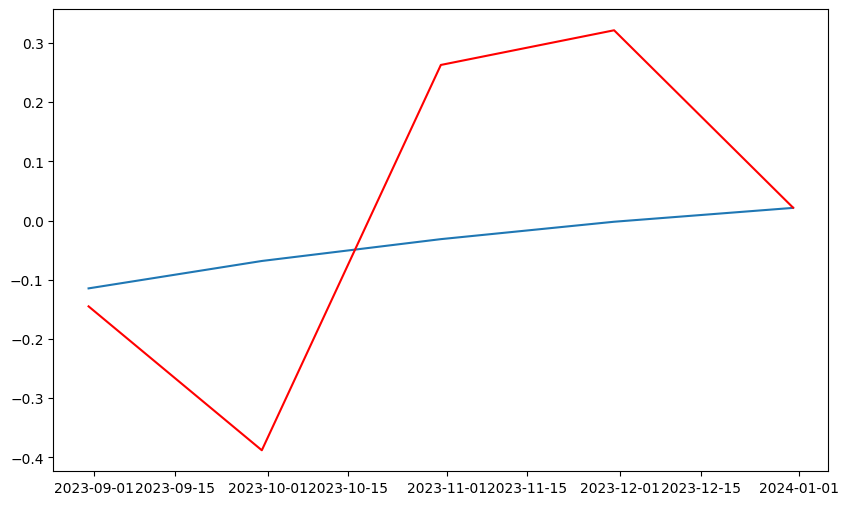

In [ ]:
plt.plot(pred)
plt.plot(test, color='red')

### 7(e) : Calculate the Error

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.24260790761070525


### 7(f) : Making future predictions

In [ ]:
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
2024-02-29    0.054988
2024-03-31    0.066838
2024-04-30    0.076281
2024-05-31    0.083806
2024-06-30    0.089802
2024-07-31    0.094580
2024-08-31    0.098388
2024-09-30    0.101422
2024-10-31    0.103840
2024-11-30    0.105766
2024-12-31    0.107302
2025-01-31    0.108525
2025-02-28    0.109500
2025-03-31    0.110277
2025-04-30    0.110896
2025-05-31    0.111389
2025-06-30    0.111782
2025-07-31    0.112096
2025-08-31    0.112345
2025-09-30    0.112544
2025-10-31    0.112703
2025-11-30    0.112829
2025-12-31    0.112930
2026-01-31    0.113010
2026-02-28    0.113074
2026-03-31    0.113125
2026-04-30    0.113165
2026-05-31    0.113198
2026-06-30    0.113223
2026-07-31    0.113244
2026-08-31    0.113260
2026-09-30    0.113273
2026-10-31    0.113284
2026-11-30    0.113292
2026-12-31    0.113298
2027-01-31    0.113304
2027-02-28    0.113308
2027-03-31    0.113311
2027-04-30    0.113314
2027-05-31    0.113316
2027-06-30    0.113318
2027-07-31    0.113319
2027-0

## Step - 8 : Implement ARIMA Model

### 8(a) : Deriving the parameters of ARIMA Models

Note :
* ARIMA model consists of 3 models
  - AR (Autoregression) model
  - Integration
  - MA (Movung Average) model
* ARIMA Model has 3 parameters
  - p : autoregressive lags
  - d : order of differnetiation (# times a time series is differentiated)
  - q : moving average

#### 8(a) - 1 : Compute d *value*
Differentiate the LogScale Data by 1 ie. d = 1

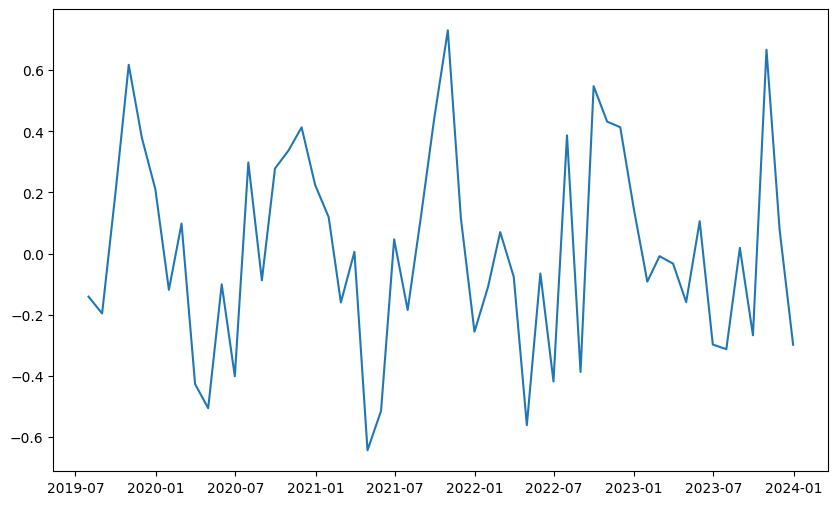

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

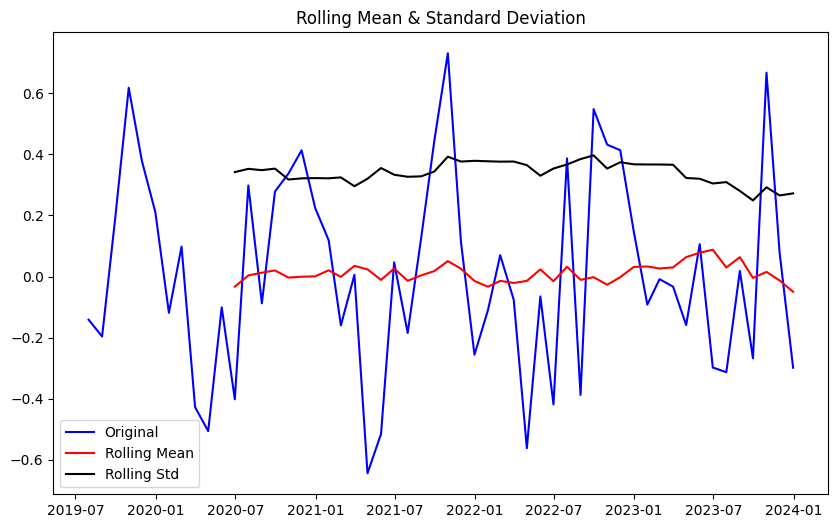

Results of Dickey Fuller Test
Test statistic              -5.575827
p-value                      0.000001
#Lags used                   9.000000
No. of observations used    44.000000
Critical value (1%)         -3.588573
Critical value (5%)         -2.929886
Critical value (10%)        -2.603185
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

* Rolling Mean, Output is quite flat.
* Null Hypothesis / ADF is rejected as the time series is stationary.
* There is no trend



* This clearly states that, the time series is not stationary. So, we require the moving average parameter in place.

* We know the value of d = 1

#### 8(a)-2 : Compute p & q values

* Autocorrelation Function (ACF) Graph : To find q value
* Partial Autocorrelation Function (PACF) Graph : To compute p value

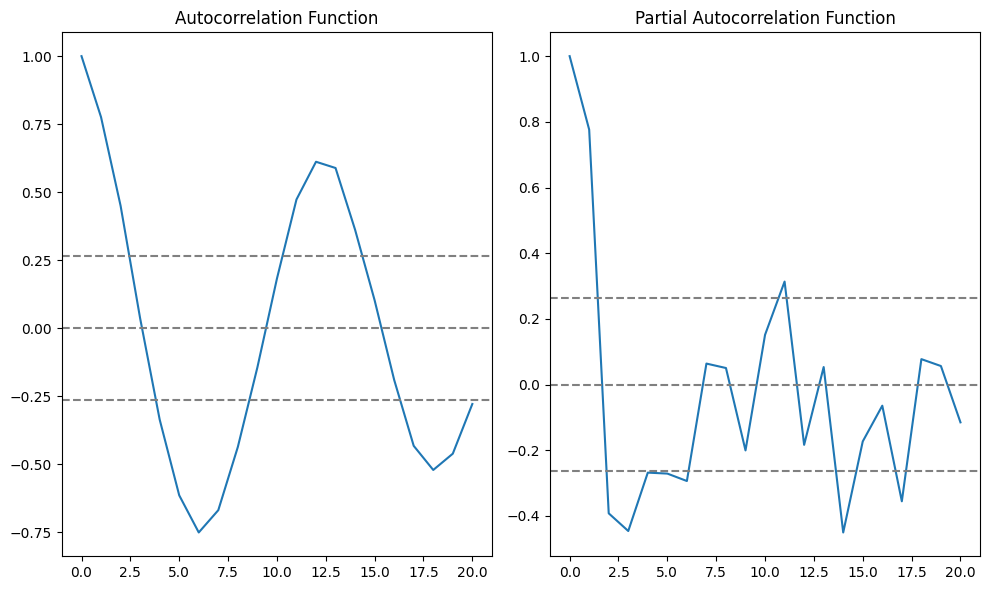

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

Check where the value drops to 0 for the first time in each of these graphs.
* In PACF graph : p value = 2 (around)
* In ACF graph : q value = 2 (around)

As we know the values of p, q, and d, Lets substitute the values in the ARIMA Model.

### 8(b) : Compute the Models

#### 8(b) - 1 : AR Model using ARIMA package

Timestamp
2019-06-30    0.106213
2019-07-31    0.024321
2019-08-31   -0.039259
2019-09-30   -0.122552
2019-10-31    0.113568
2019-11-30    0.549773
2019-12-31    0.595302
2020-01-31    0.574456
2020-02-29    0.323647
2020-03-31    0.415380
2020-04-30   -0.059476
2020-05-31   -0.379117
2020-06-30   -0.258580
2020-07-31   -0.576047
2020-08-31   -0.094117
2020-09-30   -0.268526
2020-10-31    0.057367
2020-11-30    0.285502
2020-12-31    0.548243
2021-01-31    0.580984
2021-02-28    0.574792
2021-03-31    0.334181
2021-04-30    0.372597
2021-05-31   -0.287173
2021-06-30   -0.543887
2021-07-31   -0.275039
2021-08-31   -0.451515
2021-09-30   -0.226577
2021-10-31    0.185656
2021-11-30    0.741787
2021-12-31    0.549107
2022-01-31    0.220375
2022-02-28    0.189917
2022-03-31    0.288184
2022-04-30    0.171065
2022-05-31   -0.369358
2022-06-30   -0.208944
2022-07-31   -0.587241
2022-08-31   -0.014051
2022-09-30   -0.534835
2022-10-31    0.184677
2022-11-30    0.411086
2022-12-31    0.646871
2

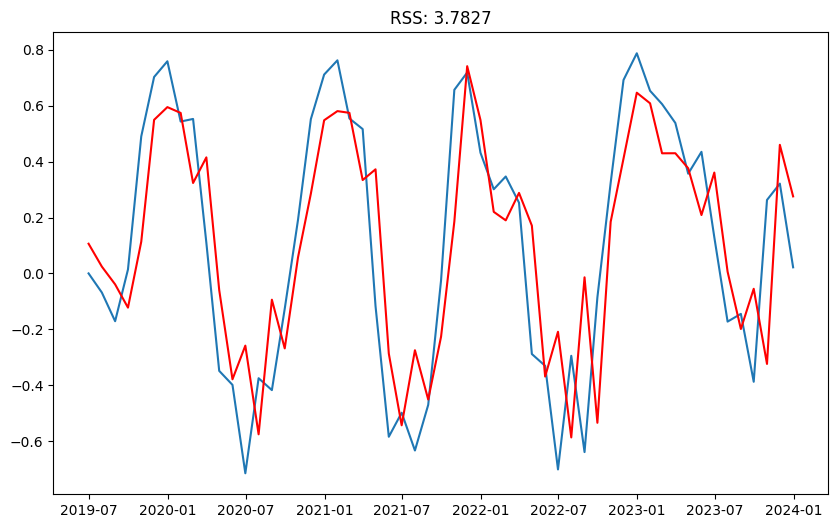

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
print("Plotting AR Model")

#### 8(b) - 2 : MA Model using ARIMA package

Timestamp
2019-06-30    0.091546
2019-07-31    0.029882
2019-08-31   -0.020026
2019-09-30   -0.085011
2019-10-31    0.080755
2019-11-30    0.528678
2019-12-31    0.552887
2020-01-31    0.413914
2020-02-29    0.373785
2020-03-31    0.364408
2020-04-30   -0.000262
2020-05-31   -0.455130
2020-06-30   -0.153128
2020-07-31   -0.400687
2020-08-31   -0.370707
2020-09-30    0.068190
2020-10-31   -0.139911
2020-11-30    0.244082
2020-12-31    0.691781
2021-01-31    0.389964
2021-02-28    0.478092
2021-03-31    0.507131
2021-04-30    0.171210
2021-05-31   -0.186321
2021-06-30   -0.570165
2021-07-31   -0.206492
2021-08-31   -0.268671
2021-09-30   -0.507445
2021-10-31    0.384285
2021-11-30    0.815025
2021-12-31    0.251137
2022-01-31    0.182624
2022-02-28    0.380536
2022-03-31    0.169385
2022-04-30    0.143641
2022-05-31   -0.264131
2022-06-30   -0.384802
2022-07-31   -0.290650
2022-08-31   -0.213666
2022-09-30   -0.342070
2022-10-31   -0.056224
2022-11-30    0.719540
2022-12-31    0.427128
2

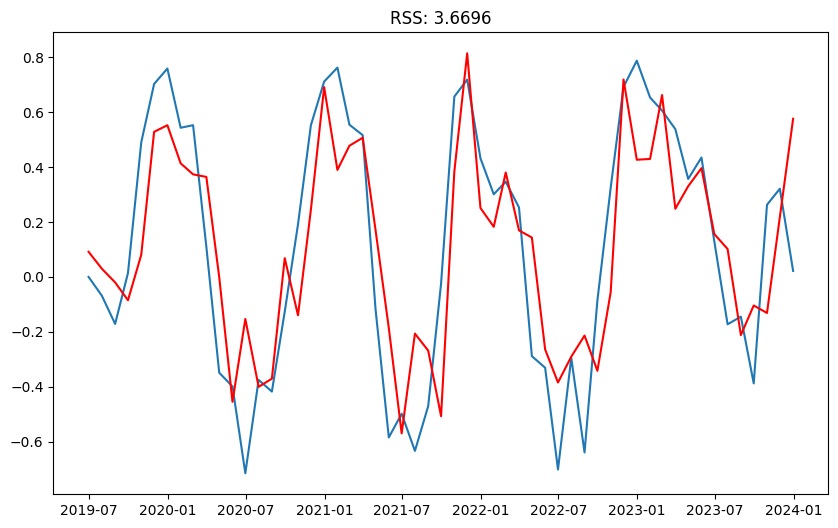

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
print("Plotting Ma Model")

 #### 8(b) - 3 : ARMA Model using ARIMA package

Timestamp
2019-06-30    0.118881
2019-07-31    0.030666
2019-08-31   -0.025405
2019-09-30   -0.096019
2019-10-31    0.065627
2019-11-30    0.428809
2019-12-31    0.605694
2020-01-31    0.587746
2020-02-29    0.346084
2020-03-31    0.218785
2020-04-30   -0.104540
2020-05-31   -0.433592
2020-06-30   -0.445960
2020-07-31   -0.504210
2020-08-31   -0.179776
2020-09-30   -0.026097
2020-10-31    0.224248
2020-11-30    0.466923
2020-12-31    0.677040
2021-01-31    0.710103
2021-02-28    0.611928
2021-03-31    0.340336
2021-04-30    0.175950
2021-05-31   -0.264429
2021-06-30   -0.604427
2021-07-31   -0.500543
2021-08-31   -0.397592
2021-09-30   -0.148428
2021-10-31    0.259762
2021-11-30    0.769963
2021-12-31    0.829122
2022-01-31    0.505565
2022-02-28    0.218253
2022-03-31    0.123151
2022-04-30    0.039697
2022-05-31   -0.288565
2022-06-30   -0.333219
2022-07-31   -0.463764
2022-08-31   -0.135592
2022-09-30   -0.170925
2022-10-31    0.201715
2022-11-30    0.550230
2022-12-31    0.784093
2

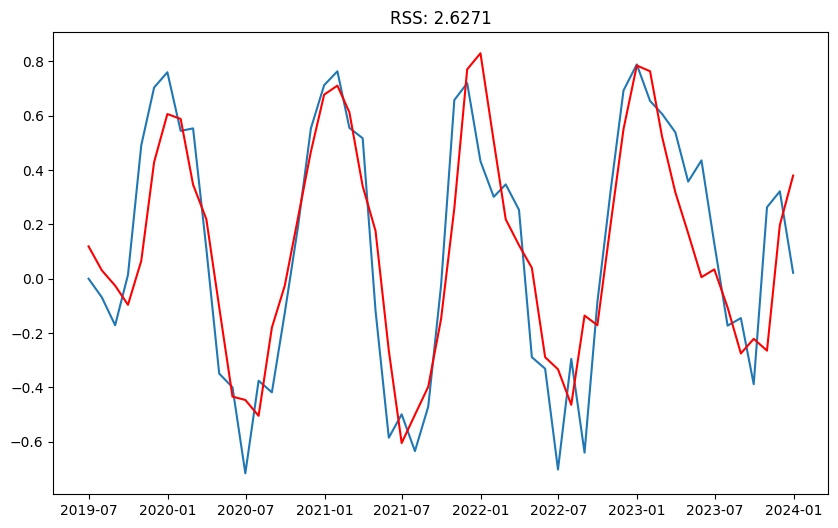

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
print("Plotting ARIMA Model")

 #### 8(b) - 4 : ARIMA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Timestamp
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31   -0.085651
2019-09-30   -0.196577
2019-10-31    0.068048
2019-11-30    0.626153
2019-12-31    0.761352
2020-01-31    0.717593
2020-02-29    0.409481
2020-03-31    0.420680
2020-04-30   -0.036106
2020-05-31   -0.418199
2020-06-30   -0.333520
2020-07-31   -0.543435
2020-08-31   -0.098906
2020-09-30   -0.117883
2020-10-31    0.172241
2020-11-30    0.426670
2020-12-31    0.671531
2021-01-31    0.691608
2021-02-28    0.618698
2021-03-31    0.336500
2021-04-30    0.267929
2021-05-31   -0.311337
2021-06-30   -0.628128
2021-07-31   -0.400306
2021-08-31   -0.417687
2021-09-30   -0.176624
2021-10-31    0.256977
2021-11-30    0.805830
2021-12-31    0.709768
2022-01-31    0.335658
2022-02-28    0.174033
2022-03-31    0.198304
2022-04-30    0.099326
2022-05-31   -0.361628
2022-06-30   -0.302888
2022-07-31   -0.537639
2022-08-31   -0.064725
2022-09-30   -0.329223
2022-10-31    0.220996
2022-11-30    0.535646
2022-12-31    0.749698
2

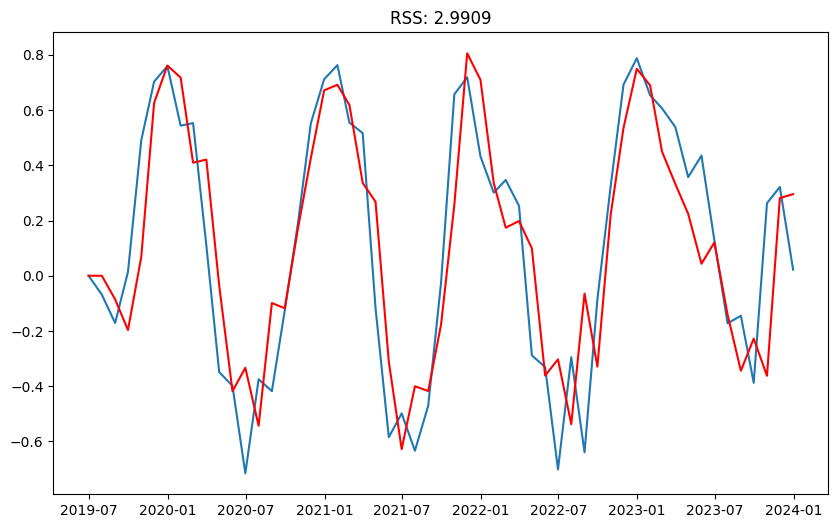

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
print("Plotting ARIMA Model")

### 8(c) : Install the pmdarima package

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15.476, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.373, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=33.431, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=51.539, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=331.317, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=24.661, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=17.446, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=18.490, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28.653, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=30.743, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=26.649, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16.422, Time=0.92 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=19.396, Time=1.58 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=40.945, Time=0.97 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:               SARIMAX(2, 0, 2)   Log Likelihood                  -1.738
Date:                Sun, 31 Mar 2024   AIC                             15.476
Time:                        20:45:12   BIC                             27.520
Sample:                    06-30-2019   HQIC                            20.133
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2339      0.202      6.094      0.000       0.837       1.631
ar.L1          1.6401      0.095     17.216      0.000       1.453       1.827
ar.L2         -0.8962      0.079    -11.350      0.000      -1.051      -0.741
ma.L1         -0.8861      0.174     -5.093      0.000      -1.227      -0.545
ma.L2          0.3441      0.171      2.011      0.044       0.009       0.679
sigma2         0.0598      0.014      4.316      0.000       0.033       0.087
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.70   Prob(JB):                         0.74
Heteroskedasticity (H):               1.92   Skew:                             0.22
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Note : SARIMAX - ARIMA with seasonality

#### Fit the ARIMA Model

Timestamp
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31   -0.082717
2019-09-30   -0.194633
2019-10-31    0.065979
2019-11-30    0.624497
2019-12-31    0.774922
2020-01-31    0.576806
2020-02-29    0.361482
2020-03-31    0.478704
2020-04-30   -0.017775
2020-05-31   -0.496760
2020-06-30   -0.299561
2020-07-31   -0.472543
2020-08-31   -0.289277
2020-09-30   -0.114930
2020-10-31    0.028902
2020-11-30    0.220691
2020-12-31    0.749486
2021-01-31    0.577735
2021-02-28    0.506581
2021-03-31    0.481972
2021-04-30    0.264508
2021-05-31   -0.299579
2021-06-30   -0.652759
2021-07-31   -0.372504
2021-08-31   -0.286992
2021-09-30   -0.406988
2021-10-31    0.226777
2021-11-30    1.022550
2021-12-31    0.486804
2022-01-31    0.095011
2022-02-28    0.289828
2022-03-31    0.246452
2022-04-30    0.145605
2022-05-31   -0.341504
2022-06-30   -0.436481
2022-07-31   -0.464240
2022-08-31   -0.113341
2022-09-30   -0.491500
2022-10-31    0.071076
2022-11-30    0.630986
2022-12-31    0.680046
2

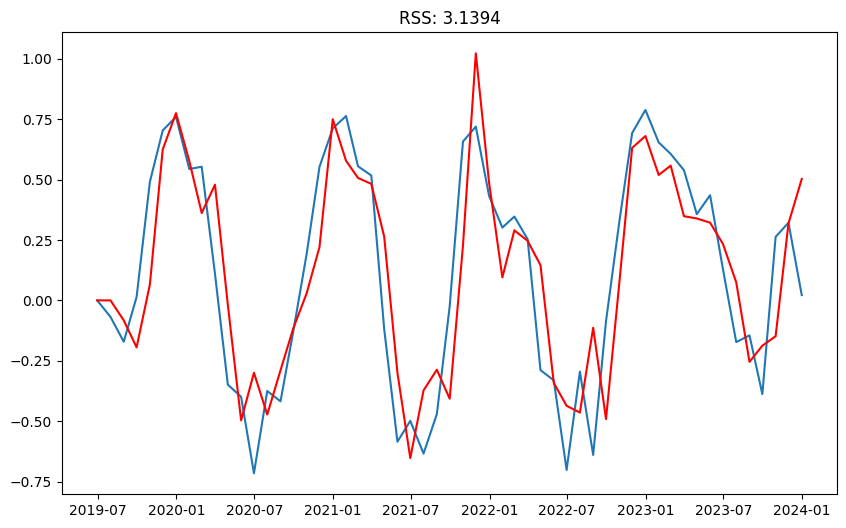

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['AQI_calculated'])**2))
print("Plotting ARIMA Model")

### 8(d) : Prepare the fitted values for predictions

Timestamp
2019-07-31    0.000000
2019-08-31   -0.140996
2019-09-30   -0.171359
2019-10-31    0.011019
2019-11-30    0.358573
2019-12-31    0.279369
2020-01-31    0.063814
2020-02-29    0.052464
2020-03-31    0.103917
2020-04-30   -0.098900
2020-05-31   -0.271930
2020-06-30   -0.011255
2020-07-31   -0.017772
2020-08-31   -0.099417
2020-09-30    0.176773
2020-10-31    0.036132
2020-11-30    0.068387
2020-12-31    0.360361
2021-01-31    0.018915
2021-02-28   -0.015625
2021-03-31    0.129088
2021-04-30   -0.111016
2021-05-31   -0.192655
2021-06-30   -0.225456
2021-07-31    0.009260
2021-08-31    0.122807
2021-09-30   -0.163465
2021-10-31    0.264567
2021-11-30    0.489551
2021-12-31   -0.140893
2022-01-31   -0.179356
2022-02-28    0.137878
2022-03-31   -0.018808
2022-04-30   -0.038271
2022-05-31   -0.137114
2022-06-30   -0.195299
2022-07-31    0.057638
2022-08-31    0.040153
2022-09-30   -0.063039
2022-10-31    0.090647
2022-11-30    0.393082
2022-12-31    0.089677
2023-01-31   -0.073646
2

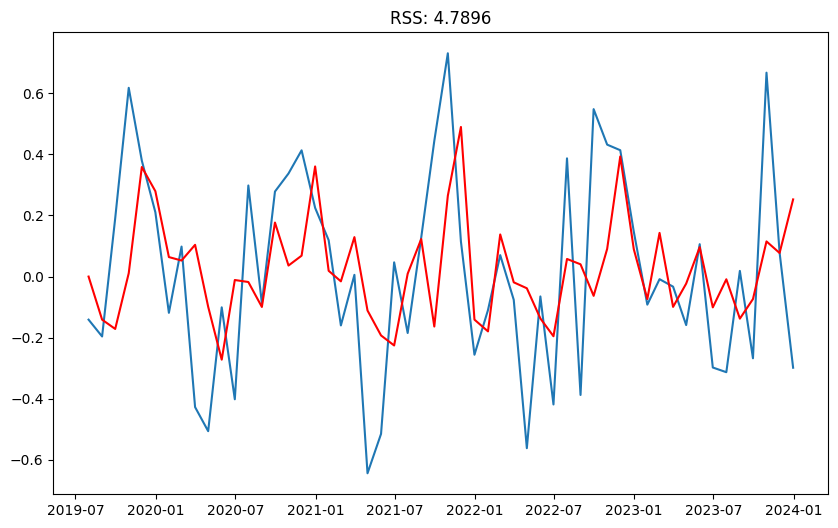

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['AQI_calculated'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['AQI_calculated'])**2))
print("Plotting ARIMA Model")

#### 8(d) - 1 : Convert the fitted values into a Series Format

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Timestamp
2019-07-31    0.000000
2019-08-31   -0.140996
2019-09-30   -0.171359
2019-10-31    0.011019
2019-11-30    0.358573
Freq: M, dtype: float64


#### 8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values

In [ ]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Timestamp
2019-07-31    0.000000
2019-08-31   -0.140996
2019-09-30   -0.312355
2019-10-31   -0.301336
2019-11-30    0.057238
Freq: M, dtype: float64


In [ ]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['AQI_calculated'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Timestamp
2019-06-30    4.281861
2019-07-31    4.281861
2019-08-31    4.140865
2019-09-30    3.969506
2019-10-31    3.980525
Freq: M, dtype: float64

#### 8(d)-3 :  Perform Exponential of the data to bring it to original form

In [ ]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

#### 8(d)-4: Plot the predictions made by ARIMA Model over the original Data

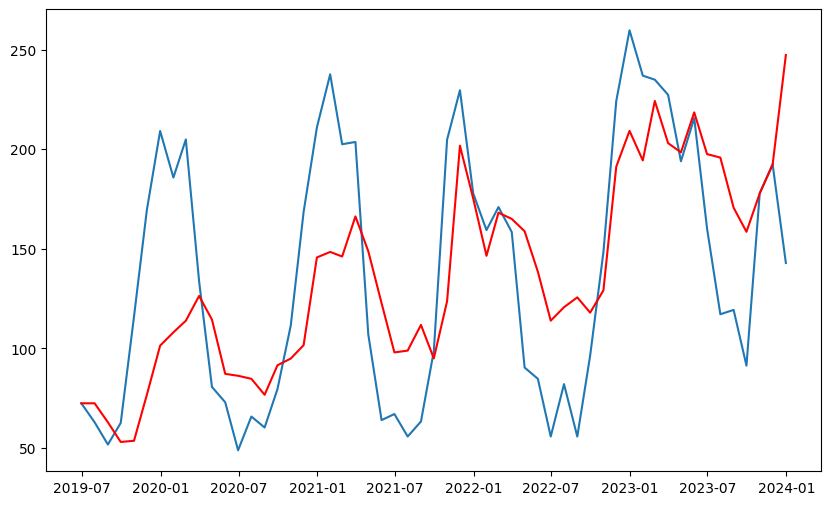

In [ ]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

NOte:  Here the ARIMA model capture the shape of the Time Series. Only the magnitude varies.

### 8(e) : Predictions for 2 years

In [ ]:
# Check the dimension of the dataset
indexedDataset_logScale

,AQI_calculated
Timestamp,
2019-06-30,4.281861
2019-07-31,4.140865
2019-08-31,3.944813
2019-09-30,4.135522
2019-10-31,4.753219
2019-11-30,5.132585
2019-12-31,5.343003
2020-01-31,5.224402
2020-02-29,5.322561


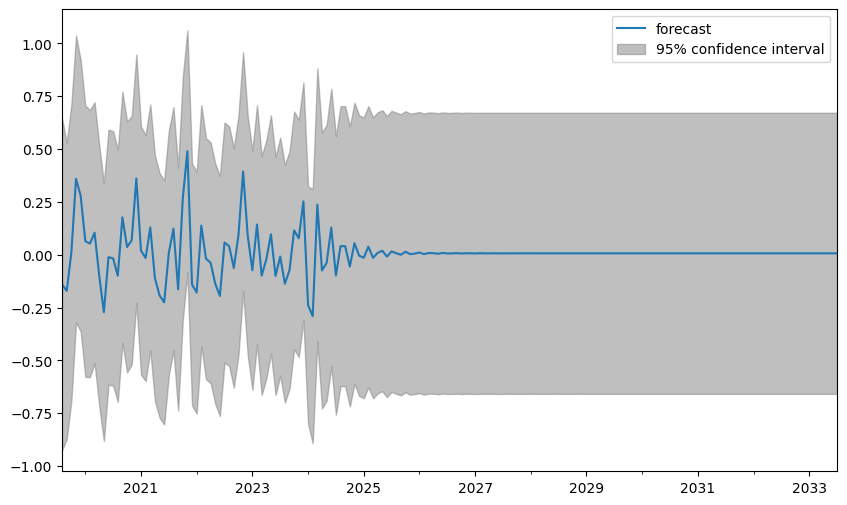

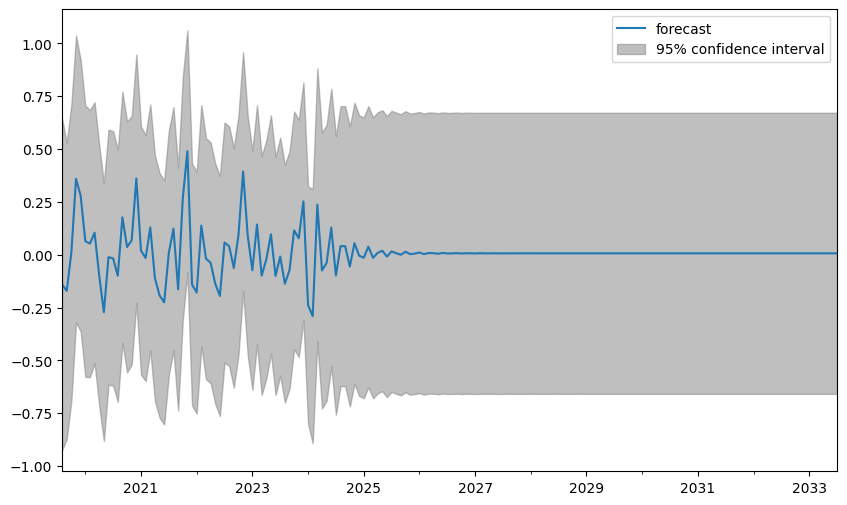

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [ ]:
results_ARIMA.forecast(steps=24)

2024-01-31   -0.238217
2024-02-29   -0.290997
2024-03-31    0.237274
2024-04-30   -0.074994
2024-05-31   -0.038823
2024-06-30    0.128244
2024-07-31   -0.098166
2024-08-31    0.040327
2024-09-30    0.040217
2024-10-31   -0.056126
2024-11-30    0.054147
2024-12-31   -0.004423
2025-01-31   -0.014610
2025-02-28    0.037953
2025-03-31   -0.014960
2025-04-30    0.008732
2025-05-31    0.018656
2025-06-30   -0.009236
2025-07-31    0.015683
2025-08-31    0.006718
2025-09-30   -0.000460
2025-10-31    0.014003
2025-11-30    0.002502
2025-12-31    0.005529
Freq: M, Name: predicted_mean, dtype: float64

### Approach  - 2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
print(datasetLogScaleMinusMovingExponentialDecayAverage.shape)
train=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[:-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[-60:]
print(train.shape,test.shape)

(55, 1)
(0, 1) (55, 1)
